# Logistic regression

Here we shall implement the logistic regression model to our dataset.

In [2]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.

import numpy as np
import pandas as pd

df = pd.read_csv('news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()

,news,label
0,smell hillary fear daniel greenfield shillman ...,0
1,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy us secretary s...,1
3,bernie supporter twitter erupt anger dnc tried...,0
4,battle new york primary matter primary day new...,1


In [3]:
# Vectorization

df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix

<6335x80967 sparse matrix of type '<class 'numpy.float64'>'
	with 1762247 stored elements in Compressed Sparse Row format>

Now we have our input vectors, the rows of the matrix `tf_idf_matrix`, and our output labels, `df_output`.

In order to perform logistic regression, we first need to split the data into test and train data.

In [50]:
# We are performing a 75:25 split.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, random_state=23)

Now we can input the training data into a logistic regression model.

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
accuracy = logreg.score(x_test, y_test)
accuracy

0.9172979797979798

So our accuracy is 91.7%. Not bad!

Let's see if changing the ratio of test to train data has any impact on our accuracy.

In [58]:
test_sizes = np.arange(0.01,0.5,0.01)
accuracys = []
for i in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size=i, random_state=23)
    logreg.fit(x_train, y_train)
    accuracy = logreg.score(x_test, y_test)
    accuracys.append(accuracy)
accuracys

[0.875,
 0.8740157480314961,
 0.900523560209424,
 0.8818897637795275,
 0.889589905362776,
 0.8976377952755905,
 0.8963963963963963,
 0.9013806706114399,
 0.8984238178633975,
 0.8990536277602523,
 0.9024390243902439,
 0.9067017082785808,
 0.9101941747572816,
 0.9165727170236753,
 0.9169295478443743,
 0.9132149901380671,
 0.9155060352831941,
 0.9123575810692375,
 0.9144518272425249,
 0.9163378058405682,
 0.9151014274981217,
 0.9153515064562411,
 0.9170096021947873,
 0.9171597633136095,
 0.9172979797979798,
 0.9168689320388349,
 0.9152542372881356,
 0.915445321307779,
 0.9156692056583242,
 0.9158337716991057,
 0.9124236252545825,
 0.9127218934911243,
 0.9124820659971306,
 0.914113277623027,
 0.9143372407574392,
 0.9140727750986409,
 0.9108361774744027,
 0.9127906976744186,
 0.9142047753945771,
 0.9127861089187056,
 0.9141647421093149,
 0.9143179255918827,
 0.913394495412844,
 0.9124820659971306,
 0.9123114696597685,
 0.9121783876500857,
 0.9126930826057756,
 0.909898059848734,
 0.90950080

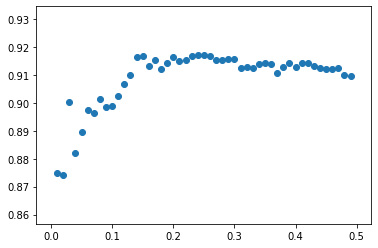

In [64]:
import matplotlib.pyplot as plt
plt.scatter(test_sizes, accuracys)

In [63]:
test_sizes[np.argmax(accuracys)]

0.25

So this model gives the greatest accuracy when we use the 75:25 ratio.